In [1]:
# numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

# scipy
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as hc

# seaborn -- for better looking plots
import seaborn as sns

# pandas 
import pandas as pd

# rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdmolops
from rdkit.Chem import Descriptors
from rdkit import DataStructs
from rdkit.Chem import rdMolDescriptors

In [1]:
pwd

'/share/home3/gpatlewi/python/Unilever/acute'

In [2]:
ls *.xlsx

acute_helman_genra.xlsx           smi_acute.xlsx
acute_input_TB.xlsx               TB_INPUT_GUI.xlsx
acuteprofiled_TB.xlsx             TB_OUTPUT_ALL_010419v1.xlsx
chemstot.xlsx                     TB_OUTPUT_ALL_010419.xlsx
first4999.xlsx                    TB_OUTPUT_API_010419.xlsx
last4999.xlsx                     TB_OUTPUT_API.xlsx
results.xlsx                      TB_OUTPUT_GUI_FINAL.xlsx
second4999.xlsx                   third4999.xlsx
small_acute_processed_wtxps.xlsx


In [3]:
xls = pd.ExcelFile('small_acute_processed_wtxps.xlsx')

In [4]:
xls.sheet_names


['first_5000_txps', 'remaining_5000_txps', 'small_acute_processed']

In [5]:
acute = xls.parse('small_acute_processed')

In [6]:
tps1 = xls.parse('first_5000_txps')

In [7]:
tps2 = xls.parse('remaining_5000_txps')

In [8]:
tps = pd.concat([tps1,tps2], axis = 0)

In [9]:
tps_acute = tps[tps['atom:element_main_group'] != '-']

In [10]:
tps_acute.head()

,INPUT,DTXSID,PREFERRED_NAME,atom:element_main_group,atom:element_metal_group_I_II,atom:element_metal_group_III,atom:element_metal_metalloid,atom:element_metal_poor_metal,atom:element_metal_transistion_metal,atom:element_noble_gas,...,ring:polycycle_bicyclo_propene,ring:polycycle_spiro_[2.2]pentane,ring:polycycle_spiro_[2.5]octane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane,ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene,ring:polycycle_tricyclo_[3.7.7]bullvalene,ring:polycycle_tricyclo_[3.7.7]semibullvalene,ring:polycycle_tricyclo_adamantane,ring:polycycle_tricyclo_benzvalene
0,DTXSID5020281,DTXSID5020281,1-Chloro-4-nitrobenzene,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,DTXSID8020961,DTXSID8020961,4-Nitroaniline,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,DTXSID0021834,DTXSID0021834,4-Nitrophenol,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,DTXSID2044347,DTXSID2044347,4'-Methoxyacetophenone,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,DTXSID4025745,DTXSID4025745,4-Nitrobenzyl chloride,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
tps_acute1 = tps_acute.loc[:, (tps_acute !=0).any(axis=0)]

In [12]:
tps_acute1.shape

(6940, 553)

In [13]:
#tps_acute1[tps_acute1['bond:C#N_cyano_cyanamide'] == 1]

In [14]:
acute.head()

,DTXSID,very_toxic,nontoxic,LD50_mgkg,EPA_category,GHS_category,casrn,mol_weight,LD50_LM
0,DTXSID5020281,False,False,460.0,2,4,100-00-5,157.550003,-0.465339
1,DTXSID8020961,False,False,750.0,3,4,100-01-6,138.126007,-0.734786
2,DTXSID0021834,False,False,170.0,2,3,100-02-7,139.110001,-0.087091
3,DTXSID2044347,False,False,1720.0,3,4,100-06-1,150.177002,-1.058925
4,DTXSID4025745,False,False,1809.0,3,4,100-14-1,171.580002,-1.022972


In [15]:
acute_tps = pd.merge(acute,tps_acute1, on = 'DTXSID')

In [16]:
acute_tps.head()

,DTXSID,very_toxic,nontoxic,LD50_mgkg,EPA_category,GHS_category,casrn,mol_weight,LD50_LM,INPUT,...,ring:polycycle_bicyclo_[2.1.1]heptane,ring:polycycle_bicyclo_[3.2.1]octane,ring:polycycle_bicyclo_[3.2.2]nonane,ring:polycycle_bicyclo_[3.3.1]nonane,ring:polycycle_bicyclo_[3.3.2]decane,ring:polycycle_bicyclo_[4.3.1]decane,ring:polycycle_bicyclo_[4.4.1]undecane,ring:polycycle_bicyclo_[5.4.1]dodecane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_tricyclo_adamantane
0,DTXSID5020281,False,False,460.0,2,4,100-00-5,157.550003,-0.465339,DTXSID5020281,...,0,0,0,0,0,0,0,0,0,0
1,DTXSID8020961,False,False,750.0,3,4,100-01-6,138.126007,-0.734786,DTXSID8020961,...,0,0,0,0,0,0,0,0,0,0
2,DTXSID0021834,False,False,170.0,2,3,100-02-7,139.110001,-0.087091,DTXSID0021834,...,0,0,0,0,0,0,0,0,0,0
3,DTXSID2044347,False,False,1720.0,3,4,100-06-1,150.177002,-1.058925,DTXSID2044347,...,0,0,0,0,0,0,0,0,0,0
4,DTXSID4025745,False,False,1809.0,3,4,100-14-1,171.580002,-1.022972,DTXSID4025745,...,0,0,0,0,0,0,0,0,0,0


In [17]:
xls1 = pd.ExcelFile('smi_acute.xlsx')

In [18]:
xls1.sheet_names

['last', 'first']

In [19]:
first = xls1.parse('first')

In [20]:
last = xls1.parse('last')

In [21]:
smi = pd.concat([first,last], axis = 0)

In [22]:
smi.head()

,INPUT,FOUND_BY,DTXSID,PREFERRED_NAME,SMILES,QSAR_READY_SMILES
0,DTXSID5020281,DSSTox_Substance_Id,DTXSID5020281,1-Chloro-4-nitrobenzene,[O-][N+](=O)C1=CC=C(Cl)C=C1,[O-][N+](=O)C1=CC=C(Cl)C=C1
1,DTXSID8020961,DSSTox_Substance_Id,DTXSID8020961,4-Nitroaniline,NC1=CC=C(C=C1)[N+]([O-])=O,NC1=CC=C(C=C1)[N+]([O-])=O
2,DTXSID0021834,DSSTox_Substance_Id,DTXSID0021834,4-Nitrophenol,OC1=CC=C(C=C1)[N+]([O-])=O,OC1=CC=C(C=C1)[N+]([O-])=O
3,DTXSID2044347,DSSTox_Substance_Id,DTXSID2044347,4'-Methoxyacetophenone,COC1=CC=C(C=C1)C(C)=O,COC1=CC=C(C=C1)C(C)=O
4,DTXSID4025745,DSSTox_Substance_Id,DTXSID4025745,4-Nitrobenzyl chloride,[O-][N+](=O)C1=CC=C(CCl)C=C1,[O-][N+](=O)C1=CC=C(CCl)C=C1


In [23]:
smi1 = smi[~smi['QSAR_READY_SMILES'].isnull()]

In [24]:
smi1.shape

(6955, 6)

In [25]:
acute_smi = pd.merge(acute_tps, smi1, on = 'DTXSID')

In [26]:
acute_smi.head()

,DTXSID,very_toxic,nontoxic,LD50_mgkg,EPA_category,GHS_category,casrn,mol_weight,LD50_LM,INPUT_x,...,ring:polycycle_bicyclo_[4.3.1]decane,ring:polycycle_bicyclo_[4.4.1]undecane,ring:polycycle_bicyclo_[5.4.1]dodecane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_tricyclo_adamantane,INPUT_y,FOUND_BY,PREFERRED_NAME_y,SMILES,QSAR_READY_SMILES
0,DTXSID5020281,False,False,460.0,2,4,100-00-5,157.550003,-0.465339,DTXSID5020281,...,0,0,0,0,0,DTXSID5020281,DSSTox_Substance_Id,1-Chloro-4-nitrobenzene,[O-][N+](=O)C1=CC=C(Cl)C=C1,[O-][N+](=O)C1=CC=C(Cl)C=C1
1,DTXSID8020961,False,False,750.0,3,4,100-01-6,138.126007,-0.734786,DTXSID8020961,...,0,0,0,0,0,DTXSID8020961,DSSTox_Substance_Id,4-Nitroaniline,NC1=CC=C(C=C1)[N+]([O-])=O,NC1=CC=C(C=C1)[N+]([O-])=O
2,DTXSID0021834,False,False,170.0,2,3,100-02-7,139.110001,-0.087091,DTXSID0021834,...,0,0,0,0,0,DTXSID0021834,DSSTox_Substance_Id,4-Nitrophenol,OC1=CC=C(C=C1)[N+]([O-])=O,OC1=CC=C(C=C1)[N+]([O-])=O
3,DTXSID2044347,False,False,1720.0,3,4,100-06-1,150.177002,-1.058925,DTXSID2044347,...,0,0,0,0,0,DTXSID2044347,DSSTox_Substance_Id,4'-Methoxyacetophenone,COC1=CC=C(C=C1)C(C)=O,COC1=CC=C(C=C1)C(C)=O
4,DTXSID4025745,False,False,1809.0,3,4,100-14-1,171.580002,-1.022972,DTXSID4025745,...,0,0,0,0,0,DTXSID4025745,DSSTox_Substance_Id,4-Nitrobenzyl chloride,[O-][N+](=O)C1=CC=C(CCl)C=C1,[O-][N+](=O)C1=CC=C(CCl)C=C1


In [27]:
from rdkit.Chem import MACCSkeys

In [28]:
df_dict = { k:v for (k,v) in zip(acute_smi['DTXSID'], acute_smi['QSAR_READY_SMILES'])}

In [29]:
df_smi = {k:Chem.MolFromSmiles(v) for k,v in df_dict.items()}

In [30]:
fpmrg = np.vstack(np.asarray(MACCSkeys.GenMACCSKeys(e)) for e in df_smi.values())

In [31]:
acute_tps.head()

,DTXSID,very_toxic,nontoxic,LD50_mgkg,EPA_category,GHS_category,casrn,mol_weight,LD50_LM,INPUT,...,ring:polycycle_bicyclo_[2.1.1]heptane,ring:polycycle_bicyclo_[3.2.1]octane,ring:polycycle_bicyclo_[3.2.2]nonane,ring:polycycle_bicyclo_[3.3.1]nonane,ring:polycycle_bicyclo_[3.3.2]decane,ring:polycycle_bicyclo_[4.3.1]decane,ring:polycycle_bicyclo_[4.4.1]undecane,ring:polycycle_bicyclo_[5.4.1]dodecane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_tricyclo_adamantane
0,DTXSID5020281,False,False,460.0,2,4,100-00-5,157.550003,-0.465339,DTXSID5020281,...,0,0,0,0,0,0,0,0,0,0
1,DTXSID8020961,False,False,750.0,3,4,100-01-6,138.126007,-0.734786,DTXSID8020961,...,0,0,0,0,0,0,0,0,0,0
2,DTXSID0021834,False,False,170.0,2,3,100-02-7,139.110001,-0.087091,DTXSID0021834,...,0,0,0,0,0,0,0,0,0,0
3,DTXSID2044347,False,False,1720.0,3,4,100-06-1,150.177002,-1.058925,DTXSID2044347,...,0,0,0,0,0,0,0,0,0,0
4,DTXSID4025745,False,False,1809.0,3,4,100-14-1,171.580002,-1.022972,DTXSID4025745,...,0,0,0,0,0,0,0,0,0,0


In [32]:
acute_tps.columns.get_loc('atom:element_main_group')

11

In [33]:
acute_tps1 = acute_tps.iloc[:,11:]

In [61]:
acute_tps1.head()

,atom:element_main_group,atom:element_metal_group_I_II,atom:element_metal_metalloid,atom:element_metal_poor_metal,atom:element_metal_transistion_metal,bond:C#N_cyano_acylcyanide,bond:C#N_cyano_cyanamide,bond:C#N_cyano_cyanohydrin,bond:C#N_nitrile_ab-acetylenic,bond:C#N_nitrile_ab-unsaturated,...,ring:polycycle_bicyclo_[2.1.1]heptane,ring:polycycle_bicyclo_[3.2.1]octane,ring:polycycle_bicyclo_[3.2.2]nonane,ring:polycycle_bicyclo_[3.3.1]nonane,ring:polycycle_bicyclo_[3.3.2]decane,ring:polycycle_bicyclo_[4.3.1]decane,ring:polycycle_bicyclo_[4.4.1]undecane,ring:polycycle_bicyclo_[5.4.1]dodecane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_tricyclo_adamantane
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
acute_tps1.shape

(6940, 550)

In [35]:
fps = np.vstack(np.asarray(acute_tps1))

In [60]:
fps


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=object)

In [36]:
from scipy.spatial.distance import jaccard, pdist, squareform, cdist

In [37]:
sim = pdist(fps, 'jaccard')

In [76]:
sim

array([0.625     , 0.625     , 0.91666667, ..., 1.        , 1.        ,
       1.        ])

In [70]:
#from math import*
#def jaccard_similarity(x,y):
#    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
#   union_cardinality = len(set.union(*[set(x), set(y)]))
#    return intersection_cardinality/float(union_cardinality)

In [39]:
simmgrn = pdist(fpmrg, 'jaccard')

In [77]:
simmgrn

array([0.23333333, 0.32352941, 0.86486486, ..., 0.9       , 0.97222222,
       0.6969697 ])

In [78]:
new_dic = { k:v for (k,v) in zip(acute_tps['DTXSID'], acute_tps['LD50_LM'])}

In [79]:
pLD50 = np.vstack(np.asarray(e) for e in new_dic.values())

In [80]:
new_dic1 = { k:v for (k,v) in zip(acute_tps['DTXSID'], acute_tps['LD50_mgkg'])}

In [81]:
LD50s = np.vstack(np.asarray(e) for e in new_dic1.values())

In [82]:
new_dic2 = { k:v for (k,v) in zip(acute_smi['DTXSID'], acute_smi['LD50_LM'])}

In [83]:
pLD50_v1 = np.vstack(np.asarray(e) for e in new_dic2.values())

In [84]:
def act_diff(v1,v2):
    return np.abs(v1-v2)

In [85]:
acts = pdist(pLD50, act_diff)

In [100]:
acts

array([0.26944639, 0.37824885, 0.5935856 , ..., 0.2957826 , 0.43647415,
       0.14069155])

In [101]:
acts_df = pd.DataFrame(squareform(acts), index = acute_tps['DTXSID'], columns = acute_tps['DTXSID'])

In [86]:
acts_mgrn = pdist(pLD50_v1, act_diff)

In [103]:
acts_mgrmdf = pd.DataFrame(squareform(acts_mgrn), index = acute_smi['DTXSID'], columns = acute_smi['DTXSID'])

In [121]:
sim_mgrndf = pd.DataFrame(squareform(simmgrn), index = acute_smi['DTXSID'], columns = acute_smi['DTXSID'])

In [122]:
simidx_mgrndf = 1- sim_mgrndf

In [341]:
''''import pickle
with open('acts_tps.pkl','wb') as f:
    pickle.dump(acts,f)

In [342]:
''''import pickle
with open('acts_mgrn.pkl','wb') as f:
    pickle.dump(acts_mgrn,f)

In [343]:
''''import pickle
with open('sim_tp.pkl','wb') as f:
    pickle.dump(sim_tp,f)

In [344]:
''''import pickle
with open('mgrn_sim.pkl','wb') as f:
    pickle.dump(mgrn_sim,f)

In [49]:
#activities = pdist(LD50s, act_diff)

In [87]:
sim_distdf = pd.DataFrame(squareform(sim), index = acute_tps['DTXSID'], columns = acute_tps['DTXSID'])

In [89]:
simdf = 1-sim_distdf

In [90]:
simdf.head()

DTXSID,DTXSID5020281,DTXSID8020961,DTXSID0021834,DTXSID2044347,DTXSID4025745,DTXSID9059208,DTXSID7026653,DTXSID6026080,DTXSID80870440,DTXSID7026655,...,DTXSID70244252,DTXSID9046998,DTXSID70244257,DTXSID60244281,DTXSID0073245,DTXSID3044752,DTXSID80244288,DTXSID0022143,DTXSID6020303,DTXSID2025395
DTXSID,,,,,,,,,,,,,,,,,,,,,
DTXSID5020281,1.000000,0.375000,0.375000,0.083333,0.266667,0.500000,0.2500,0.111111,0.333333,0.428571,...,0.300000,0.0,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.071429,0.0
DTXSID8020961,0.375000,1.000000,0.333333,0.076923,0.176471,0.428571,0.1000,0.100000,0.444444,0.375000,...,0.076923,0.0,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.0
DTXSID0021834,0.375000,0.333333,1.000000,0.076923,0.176471,0.428571,0.1000,0.100000,0.300000,0.375000,...,0.076923,0.0,0.000000,0.00,0.0,0.000000,0.0,0.071429,0.000000,0.0
DTXSID2044347,0.083333,0.076923,0.076923,1.000000,0.100000,0.200000,0.3000,0.300000,0.153846,0.181818,...,0.066667,0.0,0.055556,0.05,0.0,0.066667,0.0,0.062500,0.000000,0.0
DTXSID4025745,0.266667,0.176471,0.176471,0.100000,1.000000,0.200000,0.1875,0.117647,0.166667,0.187500,...,0.100000,0.0,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.200000,0.0


In [208]:
simdf.index

Index(['DTXSID5020281', 'DTXSID8020961', 'DTXSID0021834', 'DTXSID2044347',
       'DTXSID4025745', 'DTXSID9059208', 'DTXSID7026653', 'DTXSID6026080',
       'DTXSID80870440', 'DTXSID7026655',
       ...
       'DTXSID70244252', 'DTXSID9046998', 'DTXSID70244257', 'DTXSID60244281',
       'DTXSID0073245', 'DTXSID3044752', 'DTXSID80244288', 'DTXSID0022143',
       'DTXSID6020303', 'DTXSID2025395'],
      dtype='object', name='DTXSID', length=6940)

In [105]:
simdf_dict = {(i,c): simdf.loc[i,c] for i in simdf.index.values for c in simdf.columns.values}

In [112]:
len(simdf_dict)

48163600

In [114]:
first_four = {k: simdf_dict[k] for k in list(simdf_dict.keys())[:4]}

In [120]:
simdf2 = pd.DataFrame([simdf_dict]).T

In [110]:
acts_df_dict = {(i,c): acts_df.loc[i,c] for i in acts_df.index.values for c in acts_df.columns.values}

In [123]:
acts_df = pd.DataFrame([acts_df_dict]).T

In [124]:
import pickle
with open('simdf_dict.pkl','wb') as f:
    pickle.dump(simdf_dict,f)

In [125]:
import pickle
with open('acts_df_dict.pkl','wb') as f:
    pickle.dump(acts_df_dict,f)

In [126]:
 mgrn_dict = {(i,c): simidx_mgrndf.loc[i,c] for i in simidx_mgrndf.index.values for c in simidx_mgrndf.columns.values}

In [127]:
mgrndf2 = pd.DataFrame([mgrn_dict]).T

In [111]:
acts_mgrmdf_dict = {(i,c): acts_mgrmdf.loc[i,c] for i in acts_mgrmdf.index.values for c in acts_mgrmdf.columns.values}

In [129]:
acts_mgrn_df2 = pd.DataFrame([acts_mgrmdf_dict]).T

In [130]:
import pickle
with open('mgrn_dict.pkl','wb') as f:
    pickle.dump(mgrn_dict,f)

In [131]:
import pickle
with open('acts_mgrmdf_dict.pkl','wb') as f:
    pickle.dump(acts_mgrmdf_dict,f)

In [132]:
import pickle
with open('acts_mgrn_df2.pkl','wb') as f:
    pickle.dump(acts_mgrn_df2,f)

In [134]:
import pickle
with open('mgrn_df2.pkl','wb') as f:
    pickle.dump(mgrndf2,f)

In [135]:
import pickle
with open('simdf2.pkl','wb') as f:
    pickle.dump(simdf2 ,f)

In [136]:
import pickle
with open('acts_df.pkl','wb') as f:
    pickle.dump(acts_df,f)

In [137]:
acts_df.head()

,0
"(DTXSID00142939, DTXSID00142939)",0.000000
"(DTXSID00142939, DTXSID00143108)",1.168846
"(DTXSID00142939, DTXSID00143880)",1.351871
"(DTXSID00142939, DTXSID00144796)",1.406354
"(DTXSID00142939, DTXSID00144933)",0.925344


In [138]:
len(acts_df)
len(simdf2)

48163600

In [167]:
st10 = simdf2[0].head(20).values
at10 = acts_df[0].head(20).values

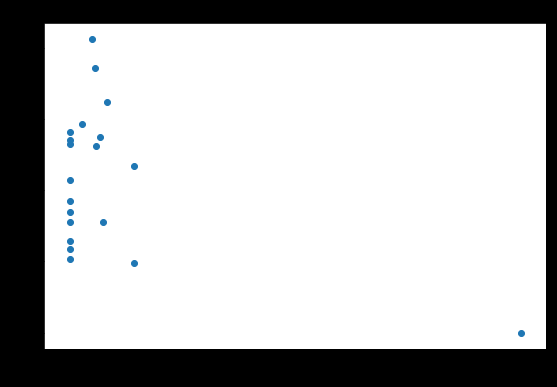

In [172]:
plt.figure(figsize = (9,6))
plt.style.use("default")
plt.title('SAS map')
plt.xlabel('Molecular Similarity (ToxPrints)')
plt.ylabel('Activity Difference (pLD50s)')
plt.scatter(st10, at10)
#plt.savefig('SAS_txps.png', dpi = 300)

In [164]:
st = simdf2[0].values
at = acts_df[0].values

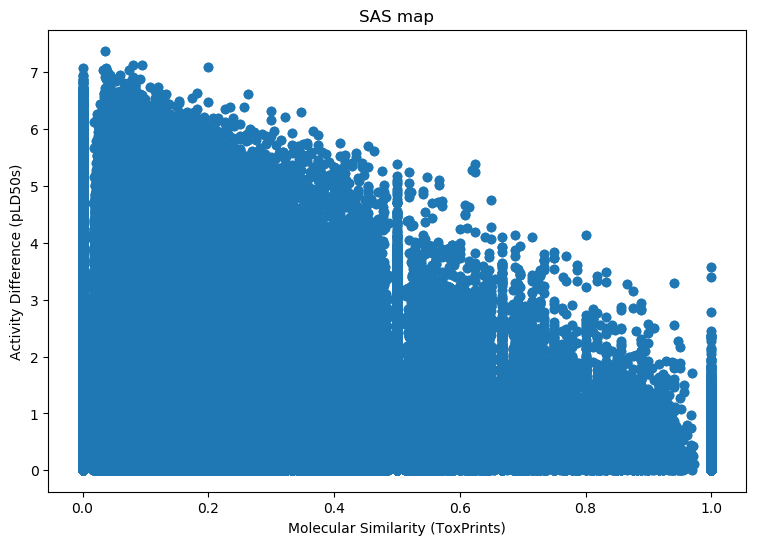

In [173]:
plt.figure(figsize = (9,6))
plt.style.use("default")
plt.title('SAS map')
plt.xlabel('Molecular Similarity (ToxPrints)')
plt.ylabel('Activity Difference (pLD50s)')
plt.scatter(st, at)
plt.savefig('SAS_txps.png', dpi = 300)

In [153]:
print(len(mgrndf2))
print(len(acts_mgrn_df2))

47941776
47941776


In [166]:
pwd

'/share/home3/gpatlewi/python/Unilever/acute'

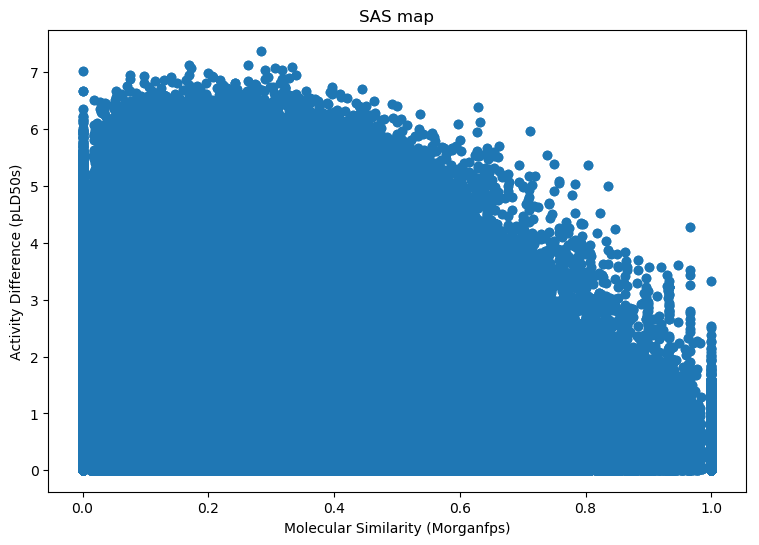

In [175]:
stm = mgrndf2[0].values
atm = acts_mgrn_df2[0].values
plt.style.use("default")
plt.figure(figsize = (9,6))
plt.title('SAS map')
plt.xlabel('Molecular Similarity (Morganfps)')
plt.ylabel('Activity Difference (pLD50s)')
plt.scatter(stm, atm)
plt.savefig('SAS_mgrn.png', dpi = 300)

In [91]:
acute_tps[acute_tps['DTXSID'].isin(['DTXSID0021834', 'DTXSID8020961'])]

,DTXSID,very_toxic,nontoxic,LD50_mgkg,EPA_category,GHS_category,casrn,mol_weight,LD50_LM,INPUT,...,ring:polycycle_bicyclo_[2.1.1]heptane,ring:polycycle_bicyclo_[3.2.1]octane,ring:polycycle_bicyclo_[3.2.2]nonane,ring:polycycle_bicyclo_[3.3.1]nonane,ring:polycycle_bicyclo_[3.3.2]decane,ring:polycycle_bicyclo_[4.3.1]decane,ring:polycycle_bicyclo_[4.4.1]undecane,ring:polycycle_bicyclo_[5.4.1]dodecane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_tricyclo_adamantane
1,DTXSID8020961,False,False,750.0,3,4,100-01-6,138.126007,-0.734786,DTXSID8020961,...,0,0,0,0,0,0,0,0,0,0
2,DTXSID0021834,False,False,170.0,2,3,100-02-7,139.110001,-0.087091,DTXSID0021834,...,0,0,0,0,0,0,0,0,0,0


In [92]:
#act_diff(-0.734786,-0.087091)

0.647695

In [93]:
#sim.shape

(24078330,)

In [94]:
#simdf.shape

(6940, 6940)

In [95]:
#acts.shape

(24078330,)

In [96]:
#acts[0]

0.26944639014

In [66]:
#activities.shape

Text(0,0.5,'Activity Difference (pLD50s)')

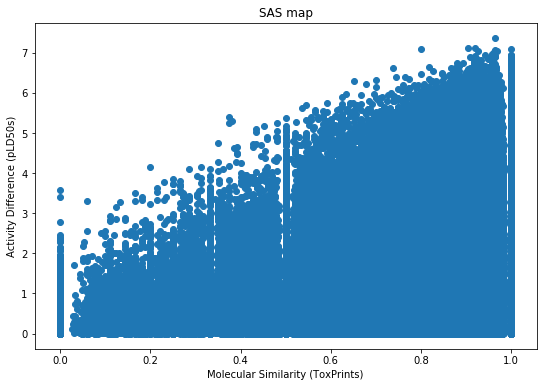

In [56]:
#plt.figure(figsize = (9,6))
#plt.scatter(sim, acts)
#plt.title('SAS map')
#plt.xlabel('Molecular Similarity (ToxPrints)')
#plt.ylabel('Activity Difference (pLD50s)')

In [ ]:
#g = sns.jointplot(x = sim, y = acts, kind = 'hex', space = 1, color = '#FF9999', gridsize = 5)
#g.set_axis_labels('Molecular Similarity', 'Activity diff')

In [59]:
from scipy import stats
stats.describe(acts)

DescribeResult(nobs=24078330, minmax=(0.0, 7.37278428354), mean=0.9562791500561749, variance=0.6392612081856541, skewness=1.3364665019106368, kurtosis=2.0310581624098045)

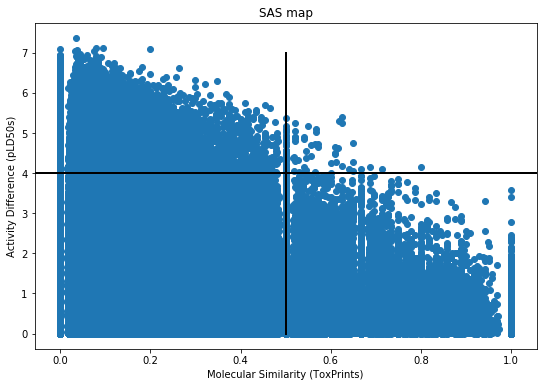

In [316]:
#plt.figure(figsize = (9,6))
#plt.scatter(sim_tp, acts)
#plt.title('SAS map')
#plt.xlabel('Molecular Similarity (ToxPrints)')
#plt.ylabel('Activity Difference (pLD50s)')
#plt.plot([0.5,0.5],[0,7], 'k-', lw = 2)
#plt.axhline(y = 4, color = 'k', lw = 2)

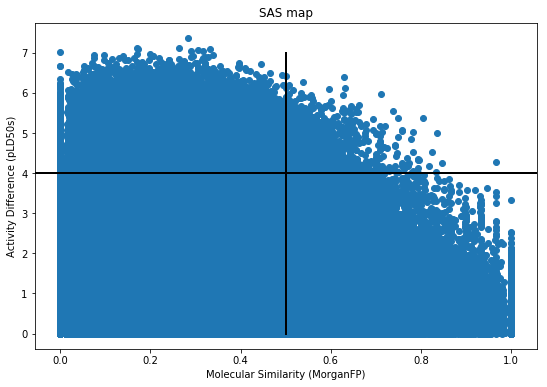

In [314]:
#plt.figure(figsize = (9,6))
#plt.scatter(mgrn_sim, acts_mgrn)
#plt.title('SAS map')
#plt.xlabel('Molecular Similarity (MorganFP)')
#plt.ylabel('Activity Difference (pLD50s)')
#plt.plot([0.5,0.5],[0,7], 'k-', lw = 2)
#plt.axhline(y = 4, color = 'k', lw = 2)

In [103]:
#actdiff = pd.Series(acts)

In [104]:
#simseries = pd.Series(sim)

In [107]:
#merged = pd.concat([actdiff,simseries],axis = 1)

In [242]:
#from itertools import combinations

In [243]:
#s = pd.Series(distance.pdist(X, 'correlation'), index = pd.MultiIndex.from_tuples(tuple(combinations(X.index,2))))

In [248]:
#s2 = pd.Series(acts, index = pd.MultiIndex.from_tuples(tuple(combinations(actsf.index,2))))

In [251]:
#s2df = s2.to_frame()

In [266]:
#s3 = s2df.reset_index()
#merged3 = merged2.reset_index()
#finaldf = pd.concat([s3,merged3],axis = 1)

In [269]:
#finaldf.head()

,level_0,level_1,0,index,0,1,0
0,DTXSID5020281,DTXSID8020961,0.269446,0,0.269446,0.625000,"(0, 1.0)"
1,DTXSID5020281,DTXSID0021834,0.378249,1,0.378249,0.625000,"(0, 2.0)"
2,DTXSID5020281,DTXSID2044347,0.593586,2,0.593586,0.916667,"(0, 3.0)"
3,DTXSID5020281,DTXSID4025745,0.557632,3,0.557632,0.733333,"(0, 4.0)"
4,DTXSID5020281,DTXSID9059208,0.711308,4,0.711308,0.500000,"(0, 5.0)"


In [273]:
#finaldf[(finaldf.iloc[:,2] > 4) & (finaldf.iloc[:,5] >0.5)]

In [275]:
#finaldf[(finaldf.iloc[:,2] > 7) & (finaldf.iloc[:,5] >0.9)].to_csv('act_cliffs.csv')

In [324]:
#finaldf[(finaldf.iloc[:,2] > 4) & (finaldf.iloc[:,5] < 0.4)].to_csv('act_cliffs1.csv')

In [325]:
#act_cliffs2 = pd.read_csv('act_cliffs1.csv')

In [279]:
#act_cliffs = pd.read_csv('act_cliffs.csv')

In [318]:
#mgrn_actcliffs = pd.Series(acts_mgrn, index = pd.MultiIndex.from_tuples(tuple(combinations(mrn_sim_df.index,2))))
#simmgrnseries = pd.Series(mgrn_sim)
#mgrn_actcliffs = mgrn_actcliffs.reset_index()
#simmgrnseries = simmgrnseries.reset_index()
#finalmorgan = pd.concat([mgrn_actcliffs,simmgrnseries],axis = 1)

In [331]:
#finalmorgan[(finalmorgan.iloc[:,2] > 4) & (finalmorgan.iloc[:,4] > 0.8)].to_csv('morgan_act_cliffs.csv')

In [336]:
#len(finalmorgan[(finalmorgan.iloc[:,2] > 4) & (finalmorgan.iloc[:,4] > 0.5)])/len(finalmorgan)*100

0.005611783259495617

In [334]:
#len(finalmorgan)

23967426

In [337]:
#len(finaldf[(finaldf.iloc[:,2] > 4) & (finaldf.iloc[:,5] < 0.5)])/len(finaldf)*100

0.00019104314958720144

In [338]:
#len(finaldf[(finaldf.iloc[:,2] > 4) & (finaldf.iloc[:,5] < 0.5)])

46

In [176]:
simdf2.head()

,0
"(DTXSID00142939, DTXSID00142939)",1.000000
"(DTXSID00142939, DTXSID00143108)",0.142857
"(DTXSID00142939, DTXSID00143880)",0.000000
"(DTXSID00142939, DTXSID00144796)",0.000000
"(DTXSID00142939, DTXSID00144933)",0.000000


In [177]:
acts_df.head()

,0
"(DTXSID00142939, DTXSID00142939)",0.000000
"(DTXSID00142939, DTXSID00143108)",1.168846
"(DTXSID00142939, DTXSID00143880)",1.351871
"(DTXSID00142939, DTXSID00144796)",1.406354
"(DTXSID00142939, DTXSID00144933)",0.925344


In [178]:
txps_sas = pd.concat([simdf2, acts_df], axis =1)

In [209]:
len(txps_sas)

48163600

In [202]:
txps_sas[(txps_sas.iloc[:,0] > 0.8) & (txps_sas.iloc[:,1] > 2)].to_csv('txps_act_cliffs_040719.csv')

In [199]:
(len(txps_sas[(txps_sas.iloc[:,0] > 0.8) & (txps_sas.iloc[:,1] > 2)])/len(txps_sas))*100

0.00033635359483095116

In [189]:
morgan_sas = pd.concat([mgrndf2,acts_mgrn_df2 ], axis = 1)


In [210]:
len(morgan_sas)

47941776

In [190]:
morgan_sas.head()

,0,0
"(DTXSID00142939, DTXSID00142939)",1.000000,0.000000
"(DTXSID00142939, DTXSID00143108)",0.384615,1.168846
"(DTXSID00142939, DTXSID00143880)",0.147059,1.351871
"(DTXSID00142939, DTXSID00144796)",0.203704,1.406354
"(DTXSID00142939, DTXSID00144933)",0.200000,0.925344


In [193]:
morgan_sas[(morgan_sas.iloc[:,0] > 0.8) & (morgan_sas.iloc[:,1] > 2)].to_csv('morgan_act_cliffs_040719.csv')

In [201]:
(len(morgan_sas[(morgan_sas.iloc[:,0] > 0.8) & (morgan_sas.iloc[:,1] > 2)])/len(morgan_sas))*100

0.0015518824333917041

In [217]:
morgan_actcliffs = morgan_sas[(morgan_sas.iloc[:,0] > 0.8) & (morgan_sas.iloc[:,1] > 2)]

In [227]:
morgan_actcliffs.columns = ['Pairwise_Similarity', 'Activity_difference']

In [228]:
morgan_actcliffs.head()

,Pairwise_Similarity,Activity_difference
"(DTXSID00155408, DTXSID40176591)",1.000000,2.002897
"(DTXSID00162132, DTXSID40161482)",0.825000,2.566658
"(DTXSID00168235, DTXSID4021218)",0.806452,2.352674
"(DTXSID00178137, DTXSID30237685)",0.931034,3.038757
"(DTXSID00185129, DTXSID30177936)",0.857143,2.298584


In [231]:
morgan_actcliffs[['Chemical_X', 'Chemical_Y']] = pd.DataFrame(morgan_actcliffs.index.tolist(), index = morgan_actcliffs.index)

/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [233]:


decimals = 2    
morgan_actcliffs['Pairwise_Similarity'] = morgan_actcliffs['Pairwise_Similarity'].apply(lambda x: round(x, decimals))
morgan_actcliffs['Activity_difference'] = morgan_actcliffs['Activity_difference'].apply(lambda x: round(x, decimals))

/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [235]:
morgan_actcliffs.to_csv('morgan_sas_040719.csv')

In [237]:
txps_actcliffs = txps_sas[(txps_sas.iloc[:,0] > 0.8) & (txps_sas.iloc[:,1] > 2)]

In [238]:
txps_actcliffs.columns = ['Pairwise_Similarity', 'Activity_difference']

In [239]:
txps_actcliffs[['Chemical_X', 'Chemical_Y']] = pd.DataFrame(txps_actcliffs.index.tolist(), index = txps_actcliffs.index)

/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [240]:
decimals = 2    
txps_actcliffs['Pairwise_Similarity'] = txps_actcliffs['Pairwise_Similarity'].apply(lambda x: round(x, decimals))
txps_actcliffs['Activity_difference'] = txps_actcliffs['Activity_difference'].apply(lambda x: round(x, decimals))

/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [242]:
txps_actcliffs.to_csv('txps_sas_041719.csv')

In [245]:
acute_tps[acute_tps['DTXSID'].isin(['DTXSID0015540', 'DTXSID40176591'])]

,DTXSID,very_toxic,nontoxic,LD50_mgkg,EPA_category,GHS_category,casrn,mol_weight,LD50_LM,INPUT,...,ring:polycycle_bicyclo_[2.1.1]heptane,ring:polycycle_bicyclo_[3.2.1]octane,ring:polycycle_bicyclo_[3.2.2]nonane,ring:polycycle_bicyclo_[3.3.1]nonane,ring:polycycle_bicyclo_[3.3.2]decane,ring:polycycle_bicyclo_[4.3.1]decane,ring:polycycle_bicyclo_[4.4.1]undecane,ring:polycycle_bicyclo_[5.4.1]dodecane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_tricyclo_adamantane
2284,DTXSID40176591,False,False,1285.0,3,4,2209-86-1,173.029999,-0.870782,DTXSID40176591,...,0,0,0,0,0,0,0,0,0,0


In [248]:
acute_smi[acute_smi['DTXSID'].isin(['DTXSID00199362', 'DTXSID10199353'])]

,DTXSID,very_toxic,nontoxic,LD50_mgkg,EPA_category,GHS_category,casrn,mol_weight,LD50_LM,INPUT_x,...,ring:polycycle_bicyclo_[4.3.1]decane,ring:polycycle_bicyclo_[4.4.1]undecane,ring:polycycle_bicyclo_[5.4.1]dodecane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_tricyclo_adamantane,INPUT_y,FOUND_BY,PREFERRED_NAME_y,SMILES,QSAR_READY_SMILES
4059,DTXSID10199353,True,False,2.5,1,1,51356-06-0,294.320007,2.070880,DTXSID10199353,...,0,0,0,0,0,DTXSID10199353,DSSTox_Substance_Id,"Phosphorodithioic acid, O,O-diethyl ester, S-e...",CCOP(=S)(OCC)SCN1N=CC=CC1=O,CCOP(=S)(OCC)SCN1N=CC=CC1=O
4068,DTXSID00199362,False,False,555.0,3,4,51356-15-1,370.420013,-0.175599,DTXSID00199362,...,0,0,0,0,0,DTXSID00199362,DSSTox_Substance_Id,"Phosphorodithioic acid, O,O-diethyl ester, S-e...",CCOP(=S)(OCC)SCN1N=C(C=CC1=O)C1=CC=CC=C1,CCOP(=S)(OCC)SCN1N=C(C=CC1=O)C1=CC=CC=C1
